# Business Data Analytics: Application and Tools
## Lecture 6: Data Formats, Web Scraping/Crawling

In [13]:
%matplotlib notebook
import requests # http requests
from lxml import html # html code --> xml tree
from collections import Counter
import matplotlib.pyplot as plt # data plots
plt.style.use('ggplot') #plot output style
import numpy as np # arrays

In [14]:
url = "https://im.iism.kit.edu/news.php" # place URL here

# HTTP request
request = requests.get(url)
html_code = request.content

print(html_code)

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">\n<html lang="de-de">\n\n    <head><!-- PageID 137 -->        <meta http-equiv="X-UA-Compatible" content="IE=edge" />\n        \n        <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<meta name="format-detection" content="telephone=no">\n<link rel="alternate" href="/news.php" hreflang="de-DE">\n<link rel="alternate" href="/english/news.php" hreflang="en-US">\n<link rel="stylesheet" href="https://static.scc.kit.edu/fancybox/dist/jquery.fancybox.min.css" />\n<link rel="stylesheet" href="https://static.scc.kit.edu/font-awesome/css/font-awesome.min.css">\n<meta name="author" content="Herrmann, Jadon (IISM)" />\n<meta name="DC.Creator" content="Herrmann, Jadon (IISM)" />\n<meta name="DC.Date" content="06.10.2014 12:06" />\n<meta name="DC.Publisher" content="Herrmann, Jadon (IISM)" />\n<meta name="DC.Contributor" content="Herrmann, Jadon (IISM)" />\n<meta name="DC.

In [16]:
# parse to XML Tree
tree = html.fromstring(html_code)

# get all dates as list of element
dates = tree.xpath("//*[@id=\"content\"]/table/tr/td[2]/text()")

#len(dates)
dates[-1]

'05.05.2015'

In [19]:
# group dates together
labels, values = zip(*Counter(dates).items())
indexes = np.arange(len(labels))
labels[1]

'14.05.2020'

<IPython.core.display.Javascript object>


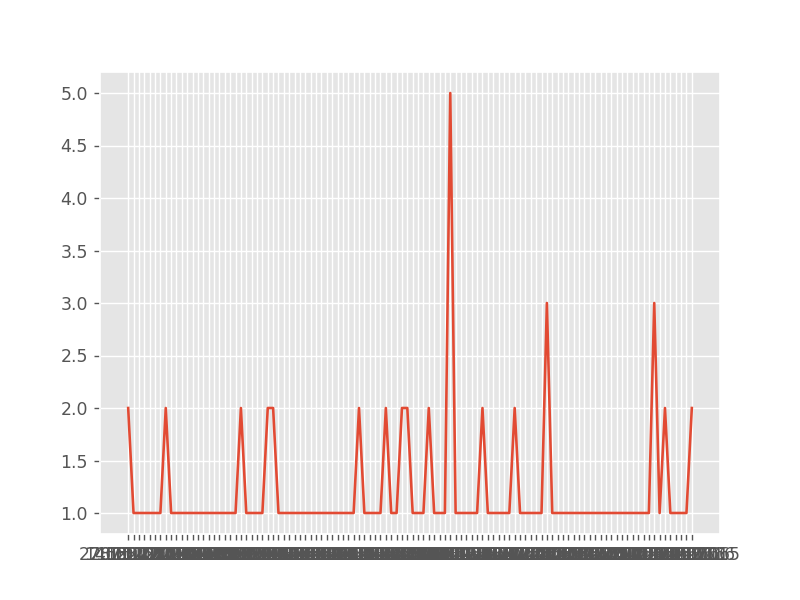

In [20]:
# plot line chart
plt.plot(indexes, values)
plt.xticks(indexes, labels)
plt.show()

# Flixbus

Erstellen Sie eine Matrix mit den Durchschnittspreisen für die Städte-Verbindungen von Karlsruhe, Augsburg, Chemnitz, Aachen und Würzburg.

In [ ]:
url = " https://shop.flixbus.de/search?adults=1&children=0&bikes=0&departureStation=&arrivalStation=&departureCity=109&arrivalCity=111&rideDate=17.11.2017&backRide=&backRideDate=19.11.2017&adults=&children=&bikes=&_locale=de&form_build_id=form-c3C1aGY0eI5YNNPUIlJTPZABC0QGlZG-rxOwhQdHCPM&form_id=fb_search_form_main&_ga=2.198169839.1190481064.1510601639-770278177.1508774859" # place URL here

# HTTP request
request = requests.get(url)
html_code = request.content

print(html_code)

In [ ]:
# save html code to disk
with open('flixbus.html', 'wb') as outputfile:
    outputfile.write(html_code)
    outputfile.close()

# Problem
* Dynamic content (e. g., JavaScript) will not be executed
* --> Incomplete website content

## Selenium
[http://www.seleniumhq.org/](http://www.seleniumhq.org/)

## Selenium Browser Automation
* Automated application testing
* Web-based administration tasks
* "Browse websites like a human"

In [2]:
from lxml import html # html code --> xml tree
from selenium import webdriver # Selenium
from selenium.webdriver.common.keys import Keys # keyboard inputs
import time # functions using time

## Dynamic Website Scraping

### Flixbus

**Aufgabe:** Erstellen Sie eine Matrix mit den Durchschnittspreisen für die Städte-Verbindungen von Karlsruhe, Augsburg, Chemnitz, Aachen und Würzburg.

In [4]:
import requests # http requests
from lxml import html # html code --> xml tree
from collections import Counter # helper functions
import itertools # helper functions

In [ ]:
from selenium import webdriver # Selenium
import pandas as pd # data frames

In [23]:
cities_dict = {
    "Karlsruhe":109, # place ID here
    "Augsburg":137,
    "Chemnitz":170,
    "Aachen":243,
    "Würzburg":111 # place ID here
}

rideDate ="17.08.2020" # place Date here
backRideDate = "18.08.2020" # place Date here

url_raw = "https://shop.flixbus.de/search?adults=1&children=0&bikes=0&departureStation=&arrivalStation=&"\
"departureCity={0}&arrivalCity={1}&rideDate={2}&backRide=&backRideDate={3}&adults=&children="\
"&bikes=&_locale=de&form_build_id=form-IR0yXk_DvVa6h8ug4Ap-s_p4LAWzsfw-64uw1h3j84I&form_id=fb_search_form_main"\
"&_ga=2.77021590.266612087.1508774859-770278177.1508774859" # place URL here

In [25]:
import pandas as pd
# data frame for results
results = pd.DataFrame(index=cities_dict.keys(), columns=cities_dict.keys())

In [26]:
results

,Karlsruhe,Augsburg,Chemnitz,Aachen,Würzburg
Karlsruhe,NaN,NaN,NaN,NaN,NaN
Augsburg,NaN,NaN,NaN,NaN,NaN
Chemnitz,NaN,NaN,NaN,NaN,NaN
Aachen,NaN,NaN,NaN,NaN,NaN
Würzburg,NaN,NaN,NaN,NaN,NaN


In [27]:
# get all combinations
combinations = list(itertools.combinations(cities_dict.keys(),2))

In [28]:
combinations

[('Karlsruhe', 'Augsburg'),
 ('Karlsruhe', 'Chemnitz'),
 ('Karlsruhe', 'Aachen'),
 ('Karlsruhe', 'Würzburg'),
 ('Augsburg', 'Chemnitz'),
 ('Augsburg', 'Aachen'),
 ('Augsburg', 'Würzburg'),
 ('Chemnitz', 'Aachen'),
 ('Chemnitz', 'Würzburg'),
 ('Aachen', 'Würzburg')]

In [ ]:
browser = webdriver.Chrome() # Use Google Chrome Browser

for combination in combinations:
    city1_id = cities_dict[combination[0]]
    city2_id = cities_dict[combination[1]]
    
    #insert current values in URL
    url = url_raw.format(city1_id, city2_id, rideDate, backRideDate)
    
    
    #request website code
    browser.get(url)
    html_code = browser.page_source
    
    #parse to XML Tree
    tree = html.fromstring(html_code)
    
    prices = tree.xpath("//span[@class=\"num\"]/text()") #insert xpath here (//span[@class=\"num\"]/text())

    
    #replace non-breaking space
    for idx, price_string in enumerate(prices):
        prices[idx] = float(price_string.replace("\xa0€","").replace(",","."))
        
    
    #calculate average price
    avg = sum(prices)/len(prices)
        
    #save average prices to "results" dataframe
    results[combination[0]][combination[1]] = avg
    results[combination[1]][combination[0]] = avg
    
browser.close()

In [ ]:
results

In [33]:
url = "https://www.flixbus.de/"

In [35]:
browser = webdriver.Chrome() # Use Google Chrome Browser

In [36]:
browser.get(url)

In [39]:
from selenium.webdriver.common.by import By

browser.find_element(By.XPATH, '//*[@id="gatsby-focus-wrapper"]/div[3]/div/div[3]/div/div[2]/a').click()

# OMDb API

## Get your own API-Key
1. Create API-Key on website
1. Receive E-Mail vom OMDb
1. Click activation link
1. Save API-key to txt file
1. Ignore this API file in your repository (via .gitignore file)!

In [6]:
import requests # http requests

In [44]:
API_KEY = open("api_key.txt", "r").read()

In [45]:
omdb_url = f"http://www.omdbapi.com/?apikey={API_KEY}&r=xml&i="

In [46]:
movie_0 = "tt0371724" # The Hitchhiker's Guide to the Galaxy
movie_1 = "tt0109830" # Forrest Gump

In [47]:
request_url = omdb_url+movie_0

In [48]:
response = requests.get(request_url)

In [49]:
response.text

'<?xml version="1.0" encoding="UTF-8"?><root response="True"><movie title="The Hitchhiker\'s Guide to the Galaxy" year="2005" rated="PG" released="29 Apr 2005" runtime="109 min" genre="Adventure, Comedy, Sci-Fi" director="Garth Jennings" writer="Douglas Adams (book), Douglas Adams (screenplay), Karey Kirkpatrick (screenplay)" actors="Bill Bailey, Anna Chancellor, Warwick Davis, Yasiin Bey" plot="Mere seconds before the Earth is to be demolished by an alien construction crew, journeyman Arthur Dent is swept off the planet by his friend Ford Prefect, a researcher penning a new edition of &amp;quot;The Hitchhiker\'s Guide to the Galaxy.&amp;quot;" language="English" country="UK, USA" awards="1 win &amp; 10 nominations." poster="https://m.media-amazon.com/images/M/MV5BZmU5MGU4MjctNjA2OC00N2FhLWFhNWQtMzQyMGI2ZmQ0Y2YyL2ltYWdlXkEyXkFqcGdeQXVyNTAyODkwOQ@@._V1_SX300.jpg" metascore="63" imdbRating="6.8" imdbVotes="182,275" imdbID="tt0371724" type="movie"/></root>'

In [52]:
response_xml = response.text

In [53]:
import xmltodict

In [54]:
response_dict = xmltodict.parse(response_xml)

In [55]:
response_dict

OrderedDict([('root',
              OrderedDict([('@response', 'True'),
                           ('movie',
                            OrderedDict([('@title',
                                          "The Hitchhiker's Guide to the Galaxy"),
                                         ('@year', '2005'),
                                         ('@rated', 'PG'),
                                         ('@released', '29 Apr 2005'),
                                         ('@runtime', '109 min'),
                                         ('@genre',
                                          'Adventure, Comedy, Sci-Fi'),
                                         ('@director', 'Garth Jennings'),
                                         ('@writer',
                                          'Douglas Adams (book), Douglas Adams (screenplay), Karey Kirkpatrick (screenplay)'),
                                         ('@actors',
                                          'Bill Bailey, Anna Chancell

In [59]:
title = response_dict["root"]["movie"]["@title"]

# Your Turn!

**Aufgabe:** Gründen Sie das nächste Multi-Millionen-$ Startup mithilfe Ihrer Scraping-Skills!

… oder nutzen Sie sie für eine Abschluss-/Seminararbeit

Die Daten sind schon da
* LinkedIn 
* Immobilienscout24
* Bloomberg
* Facebook/Twitter/Instagram
* …

## Empfehlung
Spiegel Mining
https://www.youtube.com/watch?v=-YpwsdRKt8Q

# Questions?

--> david.dann@kit.edu